In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Tensorflow

In [2]:
import tensorflow as tf

In [3]:
print (tf.__version__)

1.12.0


In [4]:
sess = tf.InteractiveSession()

In [5]:
x = tf.random_uniform((1,10), 1, 10)

In [6]:
type (x)

tensorflow.python.framework.ops.Tensor

In [7]:
a = tf.Variable(tf.random_normal((1,10), 5, 1))

In [8]:
type (a)

tensorflow.python.ops.variables.RefVariable

In [9]:
sess.run(x)

array([[1.4977096, 5.8296585, 1.1902663, 3.7551384, 6.044277 , 1.0542761,
        6.0386047, 2.0778832, 2.4713397, 2.8169627]], dtype=float32)

In [10]:
sess.run(tf.global_variables_initializer())

In [11]:
sess.run(a)

array([[5.0946217, 5.4213204, 6.5054913, 4.575379 , 4.8877497, 5.0062633,
        5.64443  , 5.0050755, 6.6320724, 7.0335684]], dtype=float32)

In [12]:
b = tf.placeholder(tf.float32)

In [13]:
sess.run(b, feed_dict={b: sess.run(x)})

array([[5.1745815, 7.4627743, 1.2841328, 6.403514 , 6.8342595, 2.8443804,
        9.289152 , 1.8859562, 4.2783356, 8.368762 ]], dtype=float32)

# Matplotlib

In [14]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt

In [19]:
import wfdb
from wfdb import processing

In [22]:
recs = ["100", "118", "217"]

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


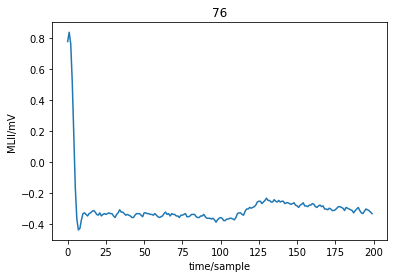

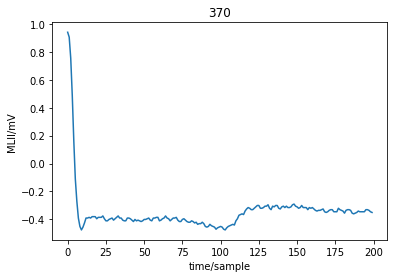

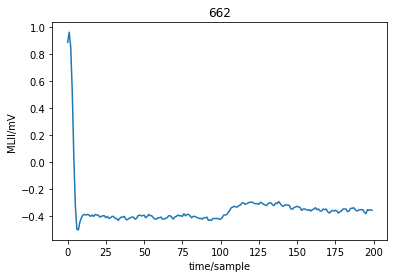

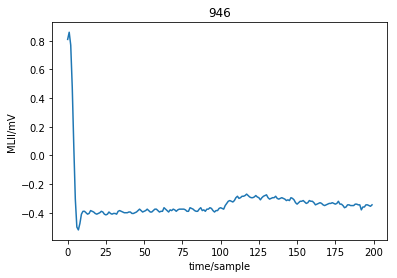

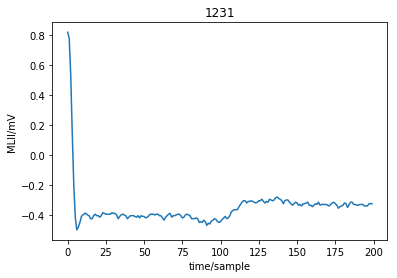

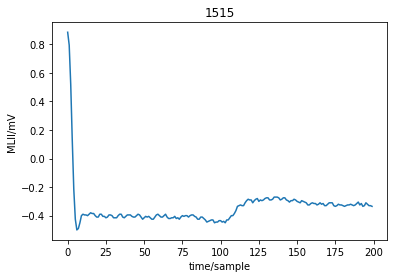

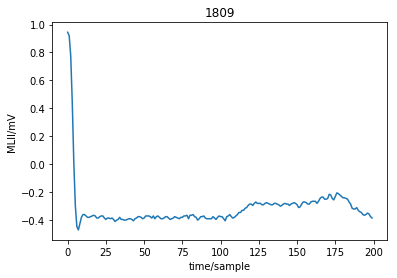

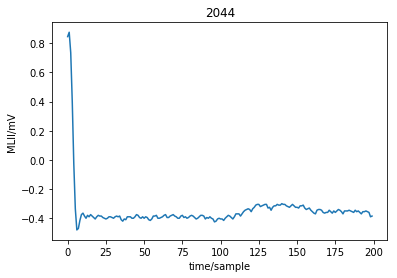

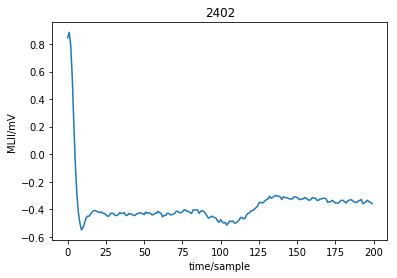

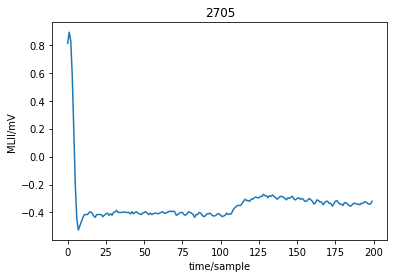

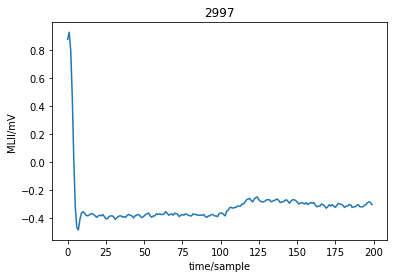

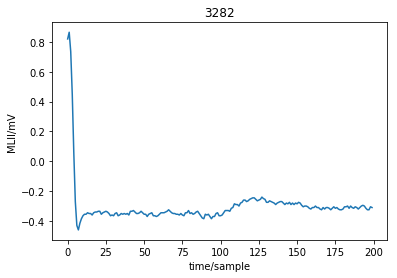

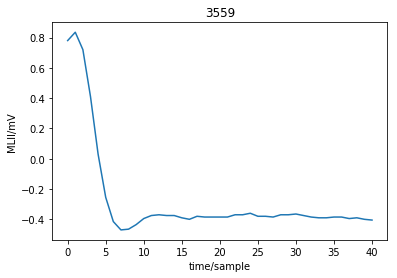

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


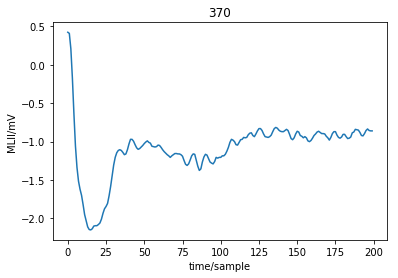

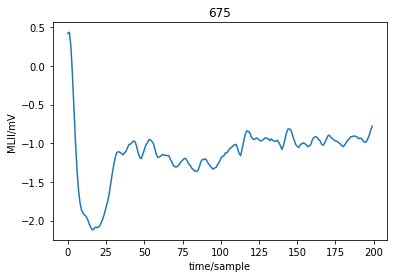

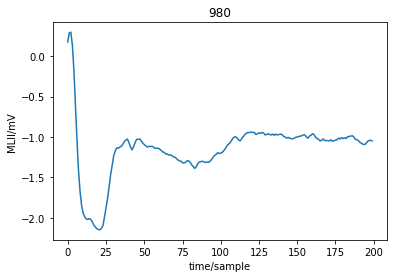

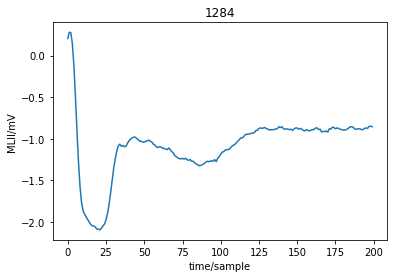

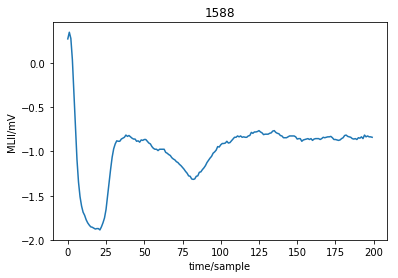

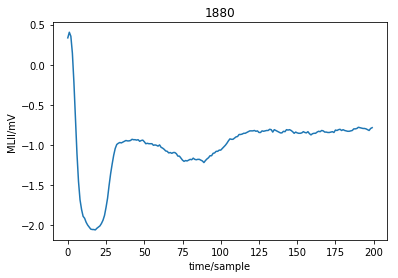

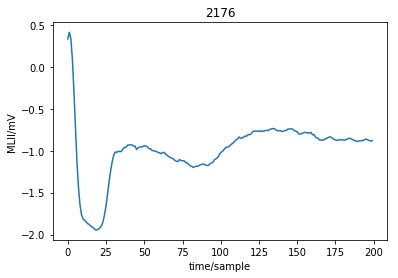

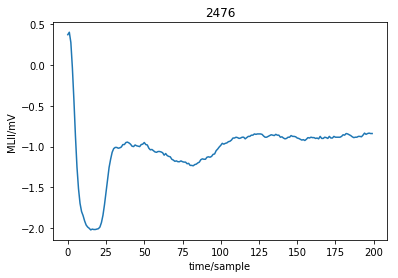

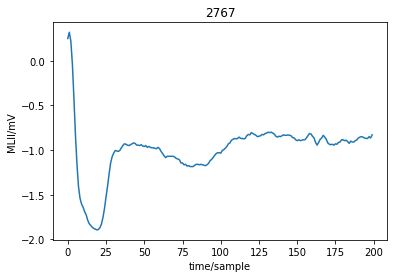

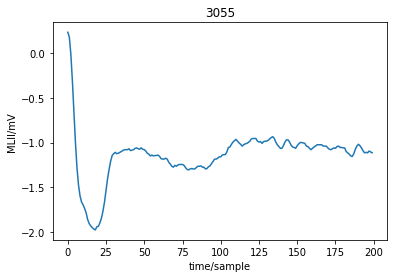

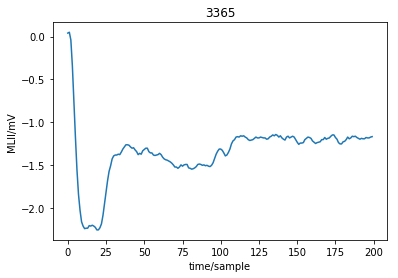

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


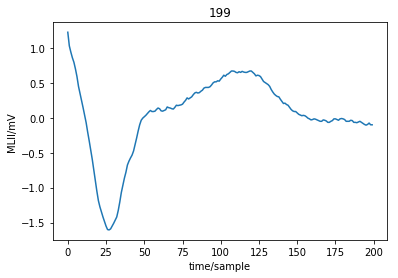

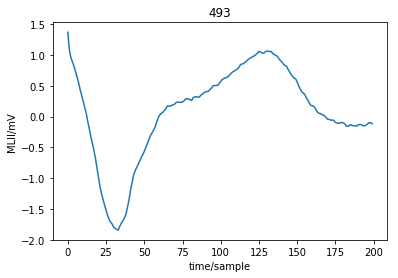

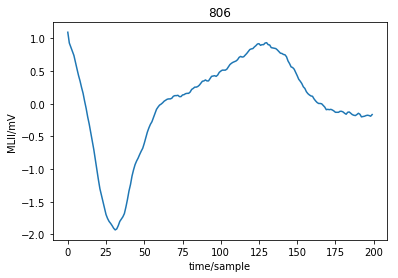

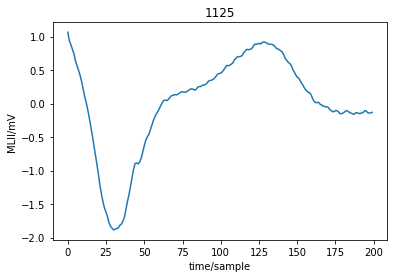

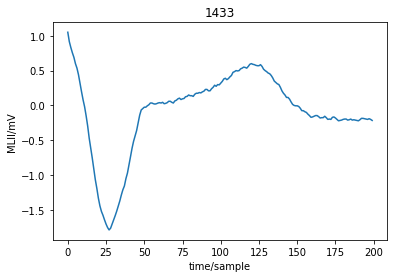

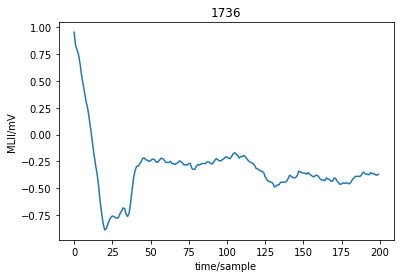

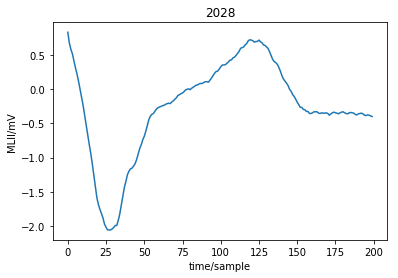

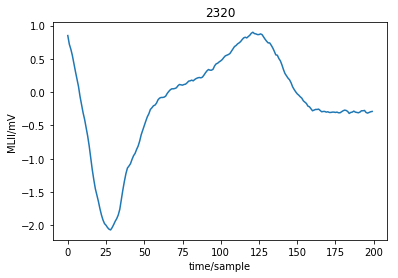

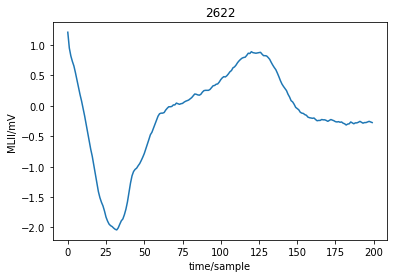

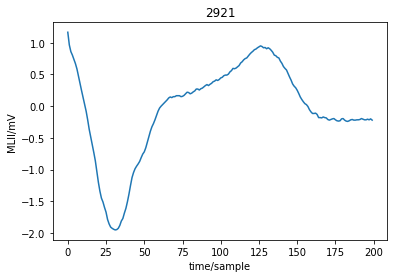

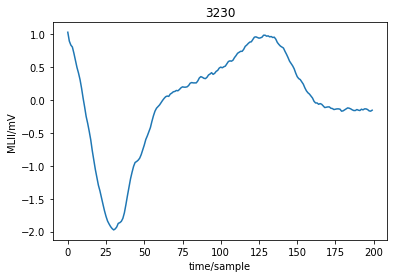

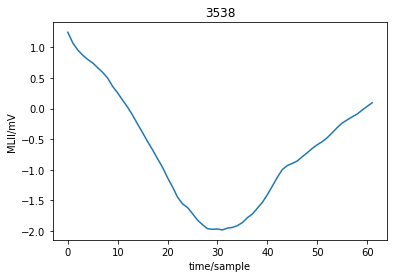

In [23]:
dataset = {}
for rec_no in recs:
    data = "../dataset/mitdb/"+rec_no
    result_to = "../dataset/images/"+rec_no
    record = wfdb.rdrecord(data, sampto=3600, channels=[0])
    rqrs = processing.xqrs_detect(record.p_signal[:,0], record.fs)
    figure = []
    for i in rqrs:
        start = i
        stop = i+200
        if start<0: 
            start=0
        if stop>3600:
            stop=3600
        temp_rec = wfdb.rdrecord(data, sampfrom=start,sampto=stop, channels=[0])
        figure.append(wfdb.plot_wfdb(record=temp_rec, title=i, return_fig=True))
        figure[-1].savefig(result_to + "/" + str(i) + ".png")
    dataset[rec_no] = figure

# Classification

In [10]:
import os, glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [11]:
train_path = '../dataset/images/'
classes = ["100", "118", "217"]

In [12]:
files = []
for fld in classes:
    path = os.path.join(train_path, fld, '*g')
    files.append(glob.glob(path))

In [13]:
img = mpimg.imread(files[0][0])

In [26]:
from PIL import Image

In [30]:
img = Image.open(files[0][0])

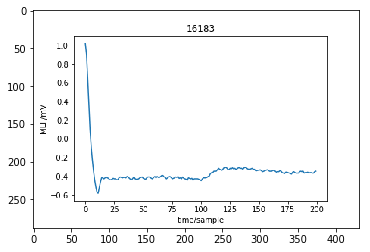

In [14]:
plt.imshow(img)

In [24]:
import tensorflow as tf

In [25]:
image_string = tf.read_file(files[0][0])

In [26]:
image = tf.image.decode_png(image_string)

In [27]:
image

<tf.Tensor 'DecodePng:0' shape=(?, ?, ?) dtype=uint8>

In [28]:
with tf.Session() as sess:
    result = sess.run(image)

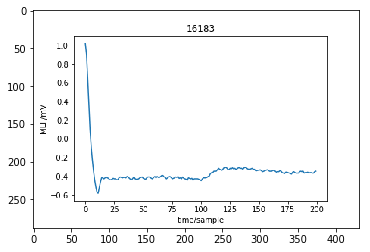

In [41]:
plt.imshow(result)

# OpenCV

In [9]:
import cv2

In [90]:
img = cv2.imread(files[0][1],1)

In [91]:
img.shape

(288, 432, 3)

In [54]:
result.shape

(288, 432, 4)

In [93]:
cv2.imshow("img",crop)
cv2.waitKey(0); cv2.destroyAllWindows()

In [92]:
crop = img[288-250:288-35, 55:390]

In [89]:
crop.shape

(215, 335, 3)